In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    # we will also use the matplotlib visualisation library
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

In [94]:
df = pd.read_csv("data/Player Per Game.csv") # load dataset into a dataframe

# removing players from seasons prior to 2013 - prior to the modern era of basketball
df = df.drop(df[df.season < 2013].index)

# Cleaning Data

## Exploring size of data and variable types

In [95]:
df.columns # list all the different columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [96]:
df.dtypes # returns the datatype of each column

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [97]:
df.shape # returns the shape of data - rows and columns

(7150, 35)

In [98]:
df.index

RangeIndex(start=0, stop=7150, step=1)

## Preliminary exploration of values in the data

In [99]:
df.sample(10) # view 10 random samples of dataset

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
3432,28244,2019,4457,Tyler Ulis,NaN,PG,23.0,3,NBA,CHI,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4826,25834,2016,3864,Chase Budinger,NaN,SF,27.0,7,NBA,IND,...,0.708,0.6,1.8,2.5,1.0,0.6,0.2,0.6,0.9,4.4
3699,27139,2018,4406,Georgios Papagiannis,NaN,C,20.0,2,NBA,POR,...,NaN,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0
4341,26522,2017,4405,Georges Niang,NaN,PF,23.0,1,NBA,IND,...,1.000,0.1,0.7,0.7,0.2,0.1,0.0,0.2,0.3,0.9
5261,26269,2016,4293,Tarik Black,NaN,C,24.0,2,NBA,LAL,...,0.422,1.1,2.9,4.0,0.4,0.4,0.5,0.6,2.0,3.4
6645,23978,2013,3802,Cartier Martin,NaN,SF,28.0,5,NBA,WAS,...,0.714,0.3,2.2,2.4,0.5,0.5,0.1,0.8,1.4,6.6
6764,24097,2013,4088,Festus Ezeli,NaN,C,23.0,1,NBA,GSW,...,0.531,1.8,2.2,4.0,0.3,0.3,0.9,0.8,2.0,2.4
2787,27599,2019,4584,Allonzo Trier,NaN,SG,23.0,1,NBA,NYK,...,0.803,0.5,2.6,3.1,1.9,0.4,0.2,1.8,1.8,10.9
5931,25710,2015,4215,Troy Daniels,NaN,SG,23.0,2,NBA,HOU,...,0.750,0.0,0.4,0.4,0.2,0.0,0.0,0.3,0.8,2.7
1079,30123,2022,4857,Kira Lewis Jr.,NaN,PG,20.0,2,NBA,NOP,...,0.833,0.4,1.3,1.6,2.0,0.5,0.0,1.1,0.7,5.9


In [100]:
df.describe() # view the description of the numerical values in the data set 

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp_per_game,fg_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
count,7150.000000,7150.000000,7150.000000,53.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,...,6709.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000
mean,27484.500000,2018.191608,4186.560559,1986.981132,26.226713,5.459720,42.595245,19.522657,19.161175,2.999608,...,0.737250,0.824909,2.600112,3.422755,1.811231,0.609021,0.376559,1.073469,1.659161,8.093930
std,2064.171545,3.135926,424.977956,5.238506,4.157743,4.089226,25.501463,25.499963,9.348372,2.149765,...,0.152881,0.765091,1.789496,2.405017,1.755544,0.422614,0.412005,0.789848,0.789432,5.934325
min,23910.000000,2013.000000,2863.000000,1975.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25697.250000,2015.000000,3891.000000,1983.000000,23.000000,2.000000,20.000000,0.000000,11.700000,1.400000,...,0.667000,0.300000,1.300000,1.700000,0.600000,0.300000,0.100000,0.500000,1.100000,3.700000
50%,27484.500000,2018.000000,4188.500000,1987.000000,26.000000,4.000000,45.000000,6.000000,18.700000,2.500000,...,0.762000,0.600000,2.200000,2.900000,1.200000,0.500000,0.300000,0.900000,1.700000,6.700000
75%,29271.750000,2021.000000,4490.000000,1990.000000,29.000000,8.000000,66.000000,34.000000,26.900000,4.200000,...,0.833000,1.100000,3.500000,4.600000,2.400000,0.800000,0.500000,1.400000,2.200000,11.200000
max,31059.000000,2023.000000,5100.000000,2002.000000,43.000000,22.000000,83.000000,82.000000,43.500000,11.500000,...,1.000000,6.000000,12.000000,18.000000,11.700000,3.500000,6.000000,5.700000,6.000000,36.100000


In [101]:
 # get info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        7150 non-null   int64  
 1   season         7150 non-null   int64  
 2   player_id      7150 non-null   int64  
 3   player         7150 non-null   object 
 4   birth_year     53 non-null     float64
 5   pos            7150 non-null   object 
 6   age            7150 non-null   float64
 7   experience     7150 non-null   int64  
 8   lg             7150 non-null   object 
 9   tm             7150 non-null   object 
 10  g              7150 non-null   int64  
 11  gs             7150 non-null   float64
 12  mp_per_game    7150 non-null   float64
 13  fg_per_game    7150 non-null   float64
 14  fga_per_game   7150 non-null   float64
 15  fg_percent     7099 non-null   float64
 16  x3p_per_game   7150 non-null   float64
 17  x3pa_per_game  7150 non-null   float64
 18  x3p_perc

## Removing columns with too many or too few unique values

In [102]:
# print sum of unique values for each column
for col in df.columns:
  print(f"{col}: {len(df[col].unique())}")

seas_id: 7150
season: 11
player_id: 1459
player: 1455
birth_year: 15
pos: 16
age: 25
experience: 22
lg: 1
tm: 33
g: 83
gs: 83
mp_per_game: 380
fg_per_game: 114
fga_per_game: 225
fg_percent: 494
x3p_per_game: 49
x3pa_per_game: 109
x3p_percent: 371
x2p_per_game: 100
x2pa_per_game: 181
x2p_percent: 466
e_fg_percent: 499
ft_per_game: 92
fta_per_game: 107
ft_percent: 536
orb_per_game: 55
drb_per_game: 113
trb_per_game: 147
ast_per_game: 110
stl_per_game: 27
blk_per_game: 35
tov_per_game: 51
pf_per_game: 47
pts_per_game: 308


In [103]:
# drop seas_id as values are unique for each row
df = df.drop(['seas_id'], axis=1)

# drop lg as it has too few unique values
df = df.drop(['lg'], axis=1)

## Removing/replacing NaN values

In [104]:
# get the number of missing data points per column
df.isnull().sum()

season              0
player_id           0
player              0
birth_year       7097
pos                 0
age                 0
experience          0
tm                  0
g                   0
gs                  0
mp_per_game         0
fg_per_game         0
fga_per_game        0
fg_percent         51
x3p_per_game        0
x3pa_per_game       0
x3p_percent       659
x2p_per_game        0
x2pa_per_game       0
x2p_percent       113
e_fg_percent       51
ft_per_game         0
fta_per_game        0
ft_percent        441
orb_per_game        0
drb_per_game        0
trb_per_game        0
ast_per_game        0
stl_per_game        0
blk_per_game        0
tov_per_game        0
pf_per_game         0
pts_per_game        0
dtype: int64

### Removing players that don't have enough minutes and games

In [105]:
# remove players that played less than 1/4 of all total games
df = df.drop(df[df.g < 30].index)

# remove players that played less than 1/4 of possible game time
df = df.drop(df[df.mp_per_game < 12].index)

## most missing values were from players who did not play a lot of minutes/games
df.isnull().sum()

season              0
player_id           0
player              0
birth_year       4121
pos                 0
age                 0
experience          0
tm                  0
g                   0
gs                  0
mp_per_game         0
fg_per_game         0
fga_per_game        0
fg_percent          0
x3p_per_game        0
x3pa_per_game       0
x3p_percent       175
x2p_per_game        0
x2pa_per_game       0
x2p_percent         0
e_fg_percent        0
ft_per_game         0
fta_per_game        0
ft_percent          0
orb_per_game        0
drb_per_game        0
trb_per_game        0
ast_per_game        0
stl_per_game        0
blk_per_game        0
tov_per_game        0
pf_per_game         0
pts_per_game        0
dtype: int64

### Removing birth_year and filling NaN x3p percent

In [106]:
# replacing NaN values for 3 point shots %
df['x3p_percent'] = np.where(df['x3p_percent'].isna(), df['x3p_per_game']/df['x3pa_per_game'], df['x3p_percent'])
df['x3p_percent'] = df['x3p_percent'].fillna(0)

# drop birth year as it has too many null values and is not relevant
df = df.drop(['birth_year'], axis=1)

# no more missing values
df.isnull().sum()

season           0
player_id        0
player           0
pos              0
age              0
experience       0
tm               0
g                0
gs               0
mp_per_game      0
fg_per_game      0
fga_per_game     0
fg_percent       0
x3p_per_game     0
x3pa_per_game    0
x3p_percent      0
x2p_per_game     0
x2pa_per_game    0
x2p_percent      0
e_fg_percent     0
ft_per_game      0
fta_per_game     0
ft_percent       0
orb_per_game     0
drb_per_game     0
trb_per_game     0
ast_per_game     0
stl_per_game     0
blk_per_game     0
tov_per_game     0
pf_per_game      0
pts_per_game     0
dtype: int64

## Removing columns that are irrelevant for clustering

In [107]:
# drop columns
df_dropped = df.drop(['season','player','player_id','experience','tm','age','gs','pos'], axis=1)

df_dropped.columns


Index(['g', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game',
       'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
       'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game',
       'tov_per_game', 'pf_per_game', 'pts_per_game'],
      dtype='object')

In [108]:
df_dropped.sample(10) # view 10 random samples of dataset

,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
6939,79,21.1,2.6,5.7,0.454,0.0,0.0,0.000,2.6,5.7,...,0.717,2.0,3.0,5.0,0.9,0.3,0.7,0.7,2.3,5.8
1130,79,25.0,4.2,10.8,0.391,3.0,8.1,0.377,1.2,2.7,...,0.817,0.3,2.5,2.9,1.5,0.5,0.2,0.5,1.1,12.1
3991,77,23.5,3.7,8.1,0.458,0.6,1.6,0.358,3.2,6.6,...,0.756,1.7,6.4,8.0,3.1,0.3,1.0,1.4,1.6,10.1
2299,73,29.7,4.4,9.4,0.470,3.7,8.3,0.446,0.7,1.1,...,0.931,0.1,3.0,3.2,1.4,0.5,0.3,1.0,2.6,13.5
6613,55,12.3,1.6,3.8,0.433,0.7,1.8,0.418,0.9,2.0,...,0.765,0.3,1.9,2.2,0.8,0.3,0.4,0.5,1.5,4.5
80,54,15.4,1.8,3.6,0.495,0.4,1.1,0.371,1.4,2.4,...,0.595,0.7,1.7,2.4,0.8,0.5,0.2,0.4,1.3,4.4
5469,59,14.3,1.5,2.7,0.562,0.0,0.0,0.000,1.5,2.7,...,0.531,2.0,3.0,5.0,0.2,0.3,0.8,0.9,2.4,3.7
5208,51,13.8,2.2,4.4,0.514,0.2,0.9,0.182,2.1,3.5,...,0.689,1.2,1.4,2.6,0.6,0.4,0.8,0.6,1.8,5.6
5832,77,29.5,5.6,12.9,0.434,0.9,3.1,0.299,4.7,9.8,...,0.830,0.7,3.5,4.2,6.0,0.8,0.1,2.4,2.2,14.5
3348,74,27.2,6.3,11.9,0.529,0.7,2.3,0.290,5.6,9.6,...,0.763,2.1,6.0,8.1,1.3,0.4,1.4,1.5,2.9,15.0


## Scaling variables between 0 and 1

In [92]:
from sklearn.preprocessing import MinMaxScaler

X = df.copy()
column_names = X.columns
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=column_names)
X.describe()

ValueError: could not convert string to float: 'PF'

<Axes: >

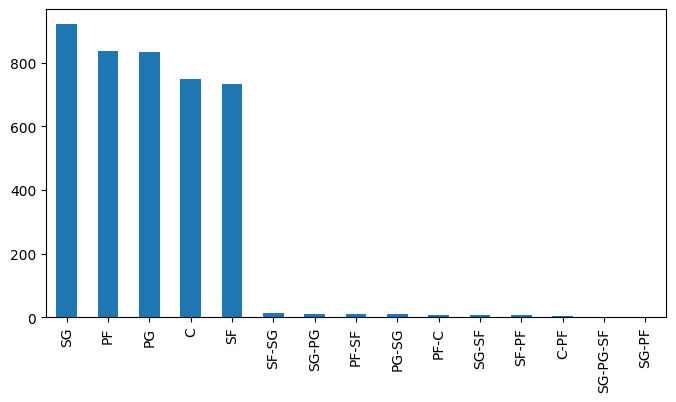

In [88]:
# look at all the different positions listed in the dataset
df['pos'].value_counts().plot.bar(figsize=(8, 4)) 